In [125]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import requests
import warnings

warnings.filterwarnings('ignore')

### Walkability Scores

In [3]:
# read walkability data into dataframe
df_walk = pd.read_csv('../data/walkability.csv')

In [4]:
df_walk.head()

,Unnamed: 0,City,Zip Code,Walk Score,Bike Score,Population,State
0,0,Cheyenne,NaN,36,49,59466,WY
1,1,Casper,NaN,36,42,55316,WY
2,2,Laramie,NaN,35,74,30816,WY
3,3,Gillette,NaN,22,31,29087,WY
4,4,Rock Springs,NaN,26,32,23036,WY


In [5]:
# dataframe that does not consider DC a state
df_walk_no_dc = df_walk[df_walk['State'] != "DC"]

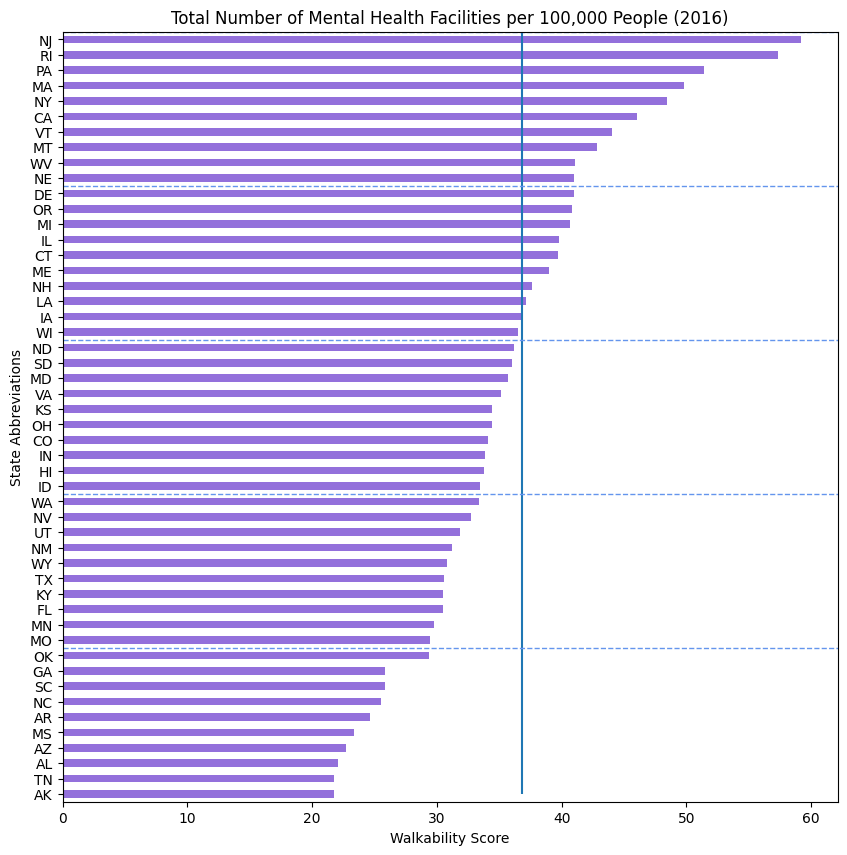

In [6]:
# group by state, get average walkability score per state and plot 
ax = (
    df_walk_no_dc.groupby('State')['Walk Score'].mean()
    .sort_values(ascending=True)
    .plot
    .barh(figsize=(10, 10), color="mediumpurple")
    # .set_facecolor('darkslategray')
)

ax.vlines(df_walk['Walk Score'].mean(), 0, 1000)

# add 
for i in range(10, len(df_walk['State']), 10):
    ax.axhline(y=i - 0.5, color='cornflowerblue', linestyle='--', linewidth=1)

# plt.xticks(rotation=30)
plt.xlabel("Walkability Score")
plt.ylabel("State Abbreviations")
plt.title("Total Number of Mental Health Facilities per 100,000 People (2016)");

### ANOVA on Walkability Data

In [7]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
from scipy.stats import f_oneway, shapiro

In [8]:
# Assuming 'data' is your DataFrame with a column 'WalkabilityScore' and a column 'Group'
data = df_walk_no_dc.groupby('State')['Walk Score'].mean().sort_values(ascending=True).to_frame()

# Shapiro-Wilk test for normality
shapiro_result = shapiro(data['Walk Score'])
shapiro_p_value = shapiro_result.pvalue

# Print result
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.4f}") # value greater than 0.05

Shapiro-Wilk p-value: 0.0756


In [9]:
# get top 10 and bottom 10 ranking state and their walkability means
walkability_top10 = df_walk_no_dc.groupby('State')['Walk Score'].mean().sort_values(ascending=True).head(10)
walkability_bottom10 = df_walk_no_dc.groupby('State')['Walk Score'].mean().sort_values(ascending=True).tail(10)

# ANOVA
f_statistic, p_value = f_oneway(walkability_top10, walkability_bottom10)

print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

F-statistic: 120.9901
P-value: 0.0000


### Activity (CDC) data

In [10]:
df_nutri = pd.read_csv("../data/nutrition_activity.csv")
df_nutri.drop(['Data_Value_Unit', 'Total', 'Data_Value_Type', 'GeoLocation'], axis=1, inplace=True)

In [11]:
df_nutri.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Gender', 'Grade', 'Race/Ethnicity', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [12]:
df_nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40096 entries, 0 to 40095
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   40096 non-null  int64  
 1   YearEnd                     40096 non-null  int64  
 2   LocationAbbr                40096 non-null  object 
 3   LocationDesc                40096 non-null  object 
 4   Datasource                  40096 non-null  object 
 5   Class                       40096 non-null  object 
 6   Topic                       40096 non-null  object 
 7   Question                    40096 non-null  object 
 8   Data_Value                  29460 non-null  float64
 9   Data_Value_Alt              29460 non-null  float64
 10  Data_Value_Footnote_Symbol  10636 non-null  object 
 11  Data_Value_Footnote         10636 non-null  object 
 12  Low_Confidence_Limit        29460 non-null  float64
 13  High_Confidence_Limit       294

In [13]:
df_nutri.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value,Data_Value_Alt,...,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,9.6,9.6,...,Asian,PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,13.3,13.3,...,NaN,OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,17.1,17.1,...,NaN,OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,65.9,65.9,...,NaN,PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,16.7,16.7,...,2 or more races,OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


Unique question in the dataset: 

|    | ClassID   | QuestionID   | Question                                                                                                                    |
|---:|:----------|:-------------|:----------------------------------------------------------------------------------------------------------------------------|
|  0 | FV        | Q020         | Percent of students in grades 9-12 who consume fruit less than 1 time daily                                                 |
|  1 | FV        | Q021         | Percent of students in grades 9-12 who consume vegetables less than 1 time daily                                            |
|  2 | OWS       | Q038         | Percent of students in grades 9-12 who have obesity                                                                         |
|  3 | OWS       | Q039         | Percent of students in grades 9-12 who have an overweight classification                                                    |
|  4 | PA        | Q048         | Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily |
|  5 | PA        | Q049         | Percent of students in grades 9-12 who participate in daily physical education                                              |
|  6 | SD        | Q058         | Percent of students in grades 9-12 who drank regular soda/pop at least one time per day                                     |
|  7 | TV        | Q059         | Percent of students in grades 9-12 watching 3 or more hours of television each school day                                   |

(table generated with code: 
```python
print(df_nutri.groupby(["ClassID", "QuestionID"])["Question"]
      .unique()
      .reset_index()
      .explode("Question")
      .to_markdown())
```
)

ClassID: 
- FV: Fruit and vegetables
- OWS: Obesity and Weight Status
- PA: Physical activity
- SD: Soda drink consumption
- TV: TV watching behavior

In [14]:
vegetable_trend = (
    pd.pivot_table(
        df_nutri.query("ClassID == 'FV'"),
        index="YearStart",
        columns="QuestionID",
        values="Data_Value",
    )
    .reset_index()
    .assign(YearStart = lambda x: pd.to_datetime(x["YearStart"], format="%Y"))
)

In [15]:
vegetable_trend.head()

QuestionID,YearStart,Q020,Q021
0,2001-01-01,39.120603,34.909091
1,2003-01-01,41.536934,37.689606
2,2005-01-01,42.597326,38.623562
3,2007-01-01,42.862774,40.415365
4,2009-01-01,40.833095,40.155643


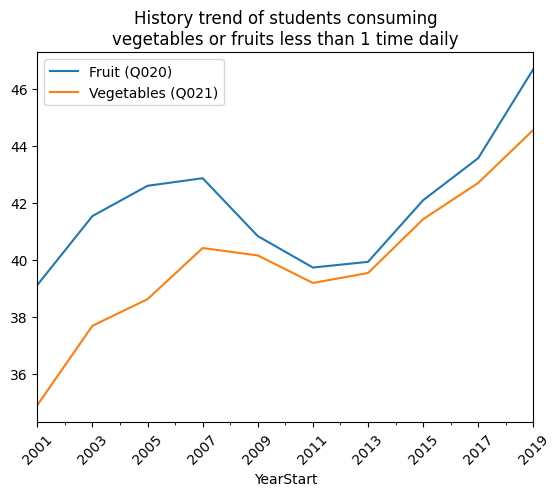

In [16]:
register_matplotlib_converters()  # This is needed for pandas datetime

# Plotting
ax = vegetable_trend.plot.line(x='YearStart')
ax.set_title("History trend of students consuming\nvegetables or fruits less than 1 time daily")
xticks = pd.date_range(start=vegetable_trend['YearStart'].min(), end="2020-01-01", freq='2Y')
ax.set_xticks(xticks)
ax.set_xticklabels([x.strftime('%Y') for x in xticks], rotation=45)
L = plt.legend()
L.get_texts()[0].set_text('Fruit (Q020)')
L.get_texts()[1].set_text('Vegetables (Q021)')

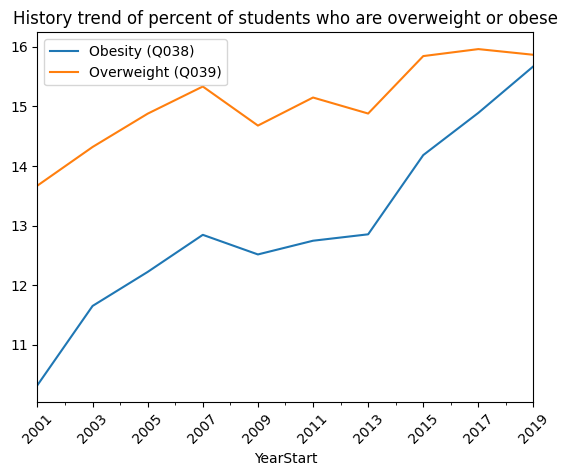

In [17]:
obesity_trend = (
    pd.pivot_table(
        df_nutri.query("ClassID == 'OWS'"),
        index="YearStart",
        columns="QuestionID",
        values="Data_Value",
    )
    .reset_index()
    .assign(YearStart = lambda x: pd.to_datetime(x["YearStart"], format="%Y"))
)

register_matplotlib_converters()  # This is needed for pandas datetime

# Plotting
ax = obesity_trend.plot.line(x='YearStart')
ax.set_title("History trend of percent of students who are overweight or obese")
xticks = pd.date_range(start=obesity_trend['YearStart'].min(), end="2020-01-01", freq='2Y')
ax.set_xticks(xticks)
ax.set_xticklabels([x.strftime('%Y') for x in xticks], rotation=45)
L = plt.legend()
L.get_texts()[0].set_text('Obesity (Q038)')
L.get_texts()[1].set_text('Overweight (Q039)')

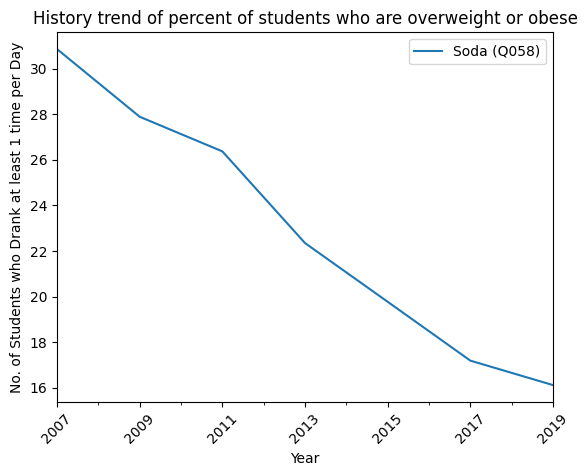

In [18]:
# soda consumption among overweight and obese students
soda_trend = (
    pd.pivot_table(
        df_nutri.query("ClassID == 'SD'"),
        index="YearStart",
        columns="QuestionID",
        values="Data_Value",
    )
    .reset_index()
    .assign(YearStart = lambda x: pd.to_datetime(x["YearStart"], format="%Y"))
)

register_matplotlib_converters()  # This is needed for pandas datetime

# Plotting
ax = soda_trend.plot.line(x='YearStart')
ax.set_title("History trend of percent of students who are overweight or obese")
xticks = pd.date_range(start=soda_trend['YearStart'].min(), end="2020-01-01", freq='2Y')
ax.set_xticks(xticks)
ax.set_xticklabels([x.strftime('%Y') for x in xticks], rotation=45)
plt.xlabel('Year')
plt.ylabel('No. of Students who Drank at least 1 time per Day')
L = plt.legend()
L.get_texts()[0].set_text('Soda (Q058)')

### SNAP Benefits Data (Most Current)
Tables:

1. [Monthly Average Number of Persons Participating in Supplemental Nutrition Assistance Program (SNAP)](https://www.kff.org/other/state-indicator/avg-monthly-participation/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)
1. [Supplemental Nutrition Assistance Program (SNAP) Total Benefits](https://www.kff.org/other/state-indicator/total-snap-program-benefits/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)
1. [Average Supplemental Nutrition Assistance Program (SNAP) Benefits Per Person](https://www.kff.org/other/state-indicator/avg-monthly-snap-benefits/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)


In [19]:
# URL of the website
url1 = "https://www.kff.org/other/state-indicator/avg-monthly-participation/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D"
url2 = "https://www.kff.org/other/state-indicator/total-snap-program-benefits/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D"
url3 = "https://www.kff.org/other/state-indicator/avg-monthly-snap-benefits/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D"


In [20]:
# read in the tables
# month_avg = pd.read_html(url1)
# total_benefits = pd.read_html(url2)
# avg_benefits = pd.read_html(url3)

In [21]:
month_avg = pd.read_csv("month_avg.csv", skiprows=[0,1,3], nrows=53)
total_benefits = pd.read_csv("total_benefits.csv", skiprows=[0,1])
avg_benefits = pd.read_csv("avg_benefits.csv", skiprows=[0,1])

In [22]:
month_avg.head()

,Location,Average Monthly SNAP Participants,Footnotes
0,California,4627744,NaN
1,Texas,3440726,NaN
2,Florida,2847086,NaN
3,New York,2839326,NaN
4,Illinois,1981714,NaN


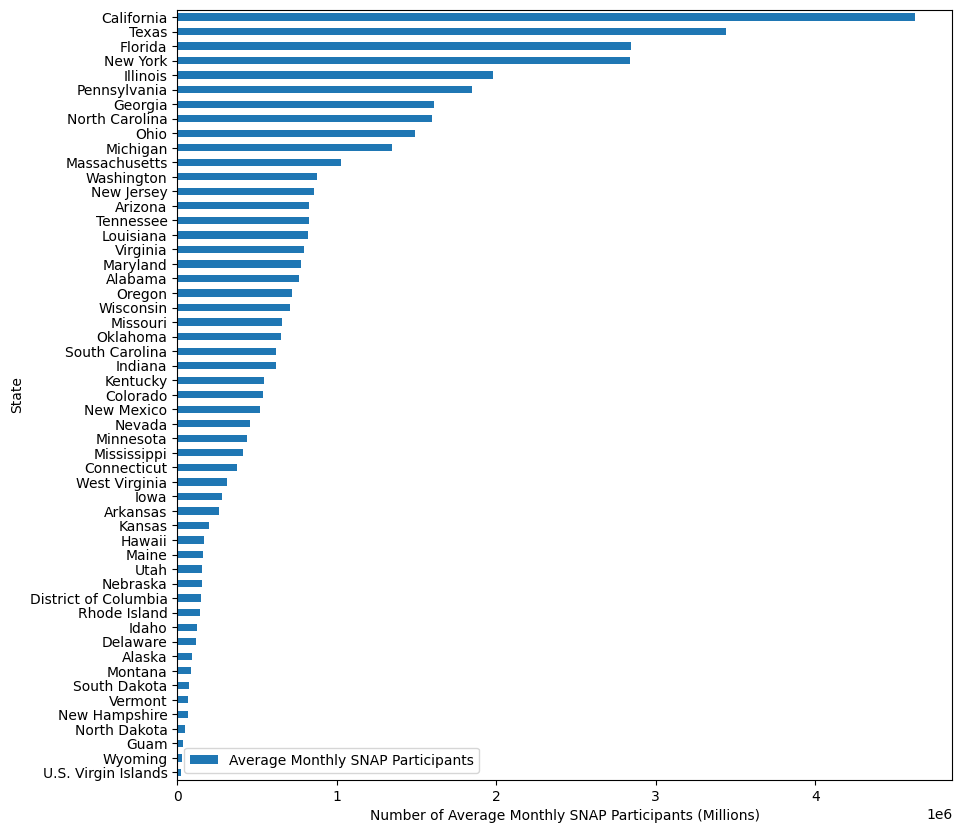

In [23]:
month_avg.sort_values("Average Monthly SNAP Participants").plot.barh(
    x="Location",
    y="Average Monthly SNAP Participants",
    figsize=(10, 10),
)
plt.xlabel("Number of Average Monthly SNAP Participants (Millions)")
plt.ylabel("State");

### SNAP Data (Across All Available Years)

In [24]:
snap = pd.read_csv("../data/SNAP_data_raw.csv", skiprows=[1])

In [25]:
snap.head()

,Unnamed: 0,Location,Average Monthly SNAP Benefits per Participant,Average Monthly SNAP Participants,Total Benefits,year
0,1,Alabama,$237,"761,074","$2,161,908,716",2022
1,2,Alaska,$315,"92,119","$348,717,900",2022
2,3,Arizona,$193,"825,666","$1,912,395,634",2022
3,4,Arkansas,$162,"262,916","$509,586,699",2022
4,5,California,$260,"4,627,744","$14,424,776,610",2022


In [26]:
snap_2019 = snap[snap["year"] == 2019]

In [27]:
snap_2019.head()

,Unnamed: 0,Location,Average Monthly SNAP Benefits per Participant,Average Monthly SNAP Participants,Total Benefits,year
161,0,United States,$130,"35,702,472 1","$55,621,882,919 1",2019
162,1,Alabama,$129,"667,043","$1,032,064,886",2019
163,2,Alaska,$181,"78,932","$171,091,672",2019
164,3,Arizona,$130,"736,883","$1,146,712,214",2019
165,4,Arkansas,$108,"354,917","$460,333,605",2019


In [28]:
# get fruit question (Q020) for 2019
fruit_2019 = df_nutri[(df_nutri['QuestionID'] == "Q020")&(df_nutri['YearStart'] == 2019)]

In [29]:
# merge for snap and fruit year 2019
snap_fruit_2019 = pd.merge(snap_2019, fruit_2019, left_on="Location", right_on="LocationDesc", how='left')

In [30]:
snap_fruit_2019.head()

,Unnamed: 0,Location,Average Monthly SNAP Benefits per Participant,Average Monthly SNAP Participants,Total Benefits,year,YearStart,YearEnd,LocationAbbr,LocationDesc,...,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,0,United States,$130,"35,702,472 1","$55,621,882,919 1",2019,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Alabama,$129,"667,043","$1,032,064,886",2019,2019.0,2019.0,AL,Alabama,...,Hawaiian/Pacific Islander,FV,FV1,Q020,VALUE,1.0,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
2,1,Alabama,$129,"667,043","$1,032,064,886",2019,2019.0,2019.0,AL,Alabama,...,NaN,FV,FV1,Q020,VALUE,1.0,Grade,12th,GRADE,GRADE12
3,1,Alabama,$129,"667,043","$1,032,064,886",2019,2019.0,2019.0,AL,Alabama,...,NaN,FV,FV1,Q020,VALUE,1.0,Grade,10th,GRADE,GRADE10
4,1,Alabama,$129,"667,043","$1,032,064,886",2019,2019.0,2019.0,AL,Alabama,...,2 or more races,FV,FV1,Q020,VALUE,1.0,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


In [31]:
snap_fruit_2019 = snap_fruit_2019[snap_fruit_2019['LocationDesc'] != 'Guam']
snap_fruit_2019 = snap_fruit_2019.dropna(subset='Data_Value')
snap_fruit_2019 = snap_fruit_2019.drop(snap_fruit_2019.index[1])

In [32]:
snap_fruit_2019["Average Monthly SNAP Benefits per Participant"] = snap_fruit_2019[
    "Average Monthly SNAP Benefits per Participant"
].apply(lambda x: int(x[1:]))

In [33]:
# get mean for percentage of students who consume fruits less than 1 time daily
sf_2019_fruits_mean = snap_fruit_2019.groupby("LocationDesc")['Data_Value'].mean().to_frame().reset_index()

In [34]:
sf_2019_benefits_mean = snap_fruit_2019.groupby("LocationDesc")["Average Monthly SNAP Benefits per Participant"].mean().to_frame().reset_index()

In [35]:
sf_2019_benefits_mean.head()

,LocationDesc,Average Monthly SNAP Benefits per Participant
0,Alabama,129.0
1,Alaska,181.0
2,Arizona,130.0
3,Arkansas,108.0
4,California,141.0


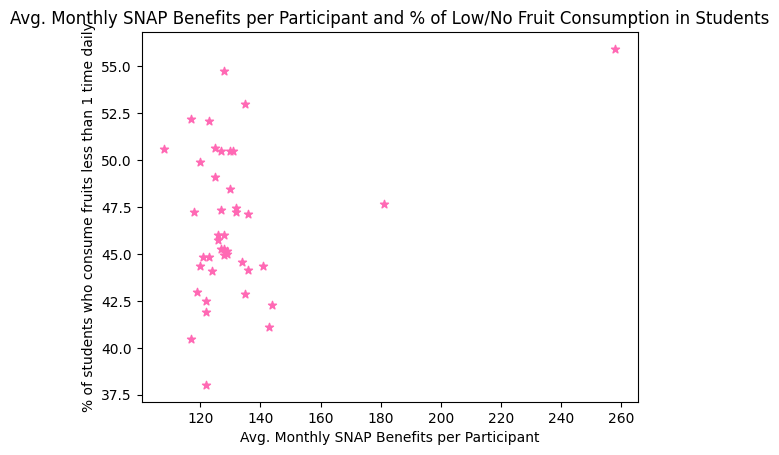

In [36]:
plt.scatter(
    sf_2019_benefits_mean["Average Monthly SNAP Benefits per Participant"],
    sf_2019_fruits_mean["Data_Value"],
    color="hotpink",
    marker="*",
)
plt.xlabel("Avg. Monthly SNAP Benefits per Participant")
plt.ylabel("% of students who consume fruits less than 1 time daily")
plt.title(
    "Avg. Monthly SNAP Benefits per Participant and % of Low/No Fruit Consumption in Students"
);

In [37]:
veg_2019 = df_nutri[
    (df_nutri["QuestionID"] == "Q021") & (df_nutri["YearStart"] == 2019)
]
snap_veg_2019 = pd.merge(
    snap_2019, veg_2019, left_on="Location", right_on="LocationDesc", how="left"
)
snap_veg_2019 = snap_veg_2019[snap_veg_2019['LocationDesc'] != 'Guam']
snap_veg_2019 = snap_veg_2019.dropna(subset="Data_Value")
snap_veg_2019 = snap_veg_2019.drop(snap_veg_2019.index[1])
snap_veg_2019["Average Monthly SNAP Benefits per Participant"] = snap_veg_2019[
    "Average Monthly SNAP Benefits per Participant"
].apply(lambda x: int(x[1:]))
sv_2019_veg_mean = snap_veg_2019.groupby("LocationDesc")['Data_Value'].mean().to_frame().reset_index()

In [38]:
sv_2019_benefits_mean = snap_veg_2019.groupby("LocationDesc")["Average Monthly SNAP Benefits per Participant"].mean().to_frame().reset_index()

In [39]:
sv_2019_benefits_mean.head()

,LocationDesc,Average Monthly SNAP Benefits per Participant
0,Alabama,129.0
1,Alaska,181.0
2,Arizona,130.0
3,Arkansas,108.0
4,Colorado,128.0


In [40]:
sv_2019_veg_mean.head()

,LocationDesc,Data_Value
0,Alabama,53.155556
1,Alaska,38.775000
2,Arizona,44.688889
3,Arkansas,51.520000
4,Colorado,33.688889


In [41]:
sv_2019_veg_mean['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland',
       'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'West Virginia'], dtype=object)

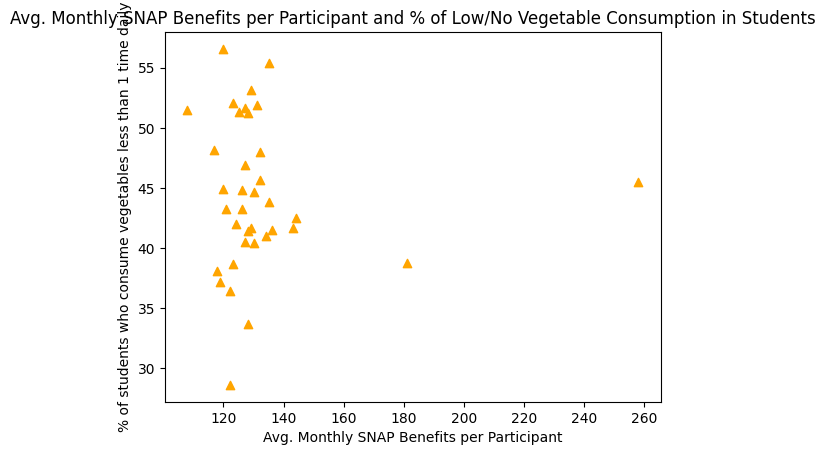

In [42]:
plt.scatter(
    sv_2019_benefits_mean["Average Monthly SNAP Benefits per Participant"],
    sv_2019_veg_mean["Data_Value"],
    color="orange",
    marker="^",
)
plt.xlabel("Avg. Monthly SNAP Benefits per Participant")
plt.ylabel("% of students who consume vegetables less than 1 time daily")
plt.title(
    "Avg. Monthly SNAP Benefits per Participant and % of Low/No Vegetable Consumption in Students"
);

#### Change Over Time (Grouped by State)

In [43]:
import matplotlib.ticker as ticker

In [44]:
snap = snap[snap['Location'] != 'Guam']

In [45]:
snap.head()

,Unnamed: 0,Location,Average Monthly SNAP Benefits per Participant,Average Monthly SNAP Participants,Total Benefits,year
0,1,Alabama,$237,"761,074","$2,161,908,716",2022
1,2,Alaska,$315,"92,119","$348,717,900",2022
2,3,Arizona,$193,"825,666","$1,912,395,634",2022
3,4,Arkansas,$162,"262,916","$509,586,699",2022
4,5,California,$260,"4,627,744","$14,424,776,610",2022


In [46]:
# snap[snap['Average Monthly SNAP Participants'].str.contains(r"\s\d+") == True]

In [47]:
snap = snap[snap['Location'] != 'United States']

In [48]:
snap["Average Monthly SNAP Benefits per Participant"] = (
    snap["Average Monthly SNAP Benefits per Participant"]
    .str.removeprefix("$")
    .replace("N/A", np.nan)
    .astype("float32")
)

In [49]:
snap['Average Monthly SNAP Participants'] = (
    snap['Average Monthly SNAP Participants']
    .str.replace(',', '')
    .replace('N/A', np.nan)
    .astype('float32')
)

In [50]:
snap['Total Benefits'] = (
    snap['Total Benefits']
    .str.replace(',', '')
    .str.removeprefix("$")
    .replace('N/A', np.nan)
    .astype('float32')
)

In [51]:
snap.Location.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Virgin Islands'],
      dtype=object)

In [52]:
snap.head()

,Unnamed: 0,Location,Average Monthly SNAP Benefits per Participant,Average Monthly SNAP Participants,Total Benefits,year
0,1,Alabama,237.0,761074.0,2.161909e+09,2022
1,2,Alaska,315.0,92119.0,3.487179e+08,2022
2,3,Arizona,193.0,825666.0,1.912396e+09,2022
3,4,Arkansas,162.0,262916.0,5.095867e+08,2022
4,5,California,260.0,4627744.0,1.442478e+10,2022


In [53]:
snap_year = snap.groupby('year')['Average Monthly SNAP Benefits per Participant'].mean().to_frame().reset_index()

In [54]:
snap_year['year'].dtype

dtype('int64')

In [55]:
snap['year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002],
      dtype=int64)

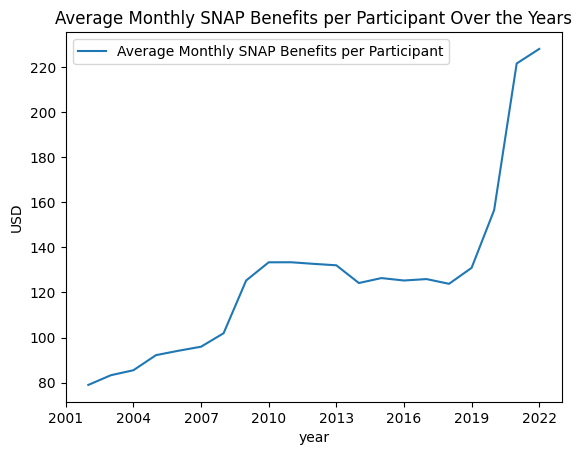

In [56]:
ax = snap_year.plot.line(x='year', y='Average Monthly SNAP Benefits per Participant')
ax.set_title("Average Monthly SNAP Benefits per Participant Over the Years")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylabel('USD');

In [57]:
snap_part_year = snap.groupby('year')['Average Monthly SNAP Participants'].mean().to_frame().reset_index()

In [58]:
snap_part_year

,year,Average Monthly SNAP Participants
0,2002,366753.46875
1,2003,408369.62500
2,2004,458305.37500
3,2005,494049.00000
4,2006,510021.34375
5,2007,505566.00000
6,2008,542206.87500
7,2009,643432.00000
8,2010,774326.00000
9,2011,859001.87500


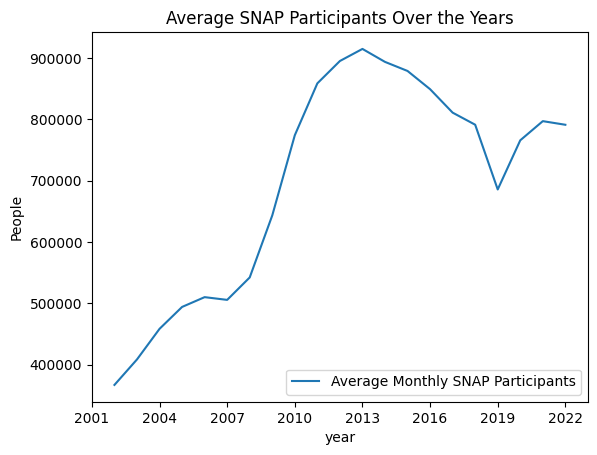

In [59]:
ax = snap_part_year.plot.line(x='year', y='Average Monthly SNAP Participants')
ax.set_title("Average SNAP Participants Over the Years")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylabel('People');

In [60]:
snap_total_year = snap.groupby('year')['Total Benefits'].mean().to_frame().reset_index()

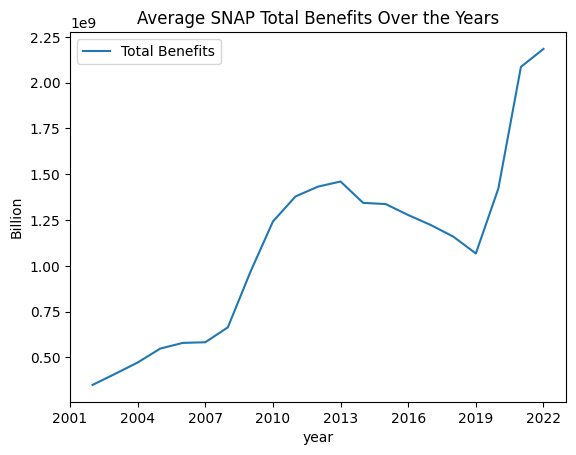

In [61]:
ax = snap_total_year.plot.line(x='year', y='Total Benefits')
ax.set_title("Average SNAP Total Benefits Over the Years")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylabel('Billion');

### Regression: Dietary habits and (1) Number of People on SNAP and (2) Benefits per Person

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [63]:
snap.head()

,Unnamed: 0,Location,Average Monthly SNAP Benefits per Participant,Average Monthly SNAP Participants,Total Benefits,year
0,1,Alabama,237.0,761074.0,2.161909e+09,2022
1,2,Alaska,315.0,92119.0,3.487179e+08,2022
2,3,Arizona,193.0,825666.0,1.912396e+09,2022
3,4,Arkansas,162.0,262916.0,5.095867e+08,2022
4,5,California,260.0,4627744.0,1.442478e+10,2022


In [103]:
dietary = df_nutri[(df_nutri["QuestionID"] == "Q020")|(df_nutri["QuestionID"] == "Q021")|(df_nutri["QuestionID"] == "Q058")]
dietary = dietary[dietary['LocationDesc'] != 'Guam']

In [104]:
dietary_snap = pd.merge(snap, dietary, left_on=['Location','year'], right_on=['LocationDesc', 'YearStart'], how='inner')

In [105]:
dietary_snap = dietary_snap.query("Stratification1 == 'Total'")

In [106]:
dietary_snap.head()

,Unnamed: 0,Location,Average Monthly SNAP Benefits per Participant,Average Monthly SNAP Participants,Total Benefits,year,YearStart,YearEnd,LocationAbbr,LocationDesc,...,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
3,1,Alabama,129.0,667043.0,1.032065e+09,2019,2019,2019,AL,Alabama,...,NaN,FV,FV1,Q021,VALUE,1,Total,Total,OVR,OVERALL
38,1,Alabama,129.0,667043.0,1.032065e+09,2019,2019,2019,AL,Alabama,...,NaN,FV,FV1,Q020,VALUE,1,Total,Total,OVR,OVERALL
40,1,Alabama,129.0,667043.0,1.032065e+09,2019,2019,2019,AL,Alabama,...,NaN,SD,SD1,Q058,VALUE,1,Total,Total,OVR,OVERALL
47,2,Alaska,181.0,78932.0,1.710917e+08,2019,2019,2019,AK,Alaska,...,NaN,FV,FV1,Q020,VALUE,2,Total,Total,OVR,OVERALL
65,2,Alaska,181.0,78932.0,1.710917e+08,2019,2019,2019,AK,Alaska,...,NaN,FV,FV1,Q021,VALUE,2,Total,Total,OVR,OVERALL


In [107]:
dietary_snap_fruit = dietary_snap[dietary_snap['QuestionID'] == 'Q020']
dietary_snap_veg = dietary_snap[dietary_snap['QuestionID'] == 'Q021']
dietary_snap_soda = dietary_snap[dietary_snap['QuestionID'] == 'Q058']

In [114]:
dietary_snap_fruit.head()

,Unnamed: 0,Location,Average Monthly SNAP Benefits per Participant,Average Monthly SNAP Participants,Total Benefits,year,YearStart,YearEnd,LocationAbbr,LocationDesc,...,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
38,1,Alabama,129.0,667043.0,1.032065e+09,2019,2019,2019,AL,Alabama,...,NaN,FV,FV1,Q020,VALUE,1,Total,Total,OVR,OVERALL
47,2,Alaska,181.0,78932.0,1.710917e+08,2019,2019,2019,AK,Alaska,...,NaN,FV,FV1,Q020,VALUE,2,Total,Total,OVR,OVERALL
123,3,Arizona,130.0,736883.0,1.146712e+09,2019,2019,2019,AZ,Arizona,...,NaN,FV,FV1,Q020,VALUE,4,Total,Total,OVR,OVERALL
154,4,Arkansas,108.0,354917.0,4.603336e+08,2019,2019,2019,AR,Arkansas,...,NaN,FV,FV1,Q020,VALUE,5,Total,Total,OVR,OVERALL
198,5,California,141.0,3529470.0,5.977282e+09,2019,2019,2019,CA,California,...,NaN,FV,FV1,Q020,VALUE,6,Total,Total,OVR,OVERALL


In [119]:
# Regression: Dietary Habits (fruit) ~ Number of participants in SNAP
df_snap_ppl = smf.ols("Q('Data_Value') ~ C(year) + Q('Average Monthly SNAP Participants')", data=dietary_snap_fruit).fit()
df_snap_ppl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Data_Value')   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.32e-08
Time:                        20:41:54   Log-Likelihood:                -1001.7
No. Observations:                 339   AIC:                             2023.
Df Residuals:                     329   BIC:                             2062.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 41.5744      0.884     47.044      0.000      39.836      43.313
C(year)[T.2005]                            1.2733      1.177      1.082      0.280      -1.043       3.589
C(year)[T.2007]                            1.4320      1.151      1.244      0.214      -0.832       3.696
C(year)[T.2009]                           -0.1992      1.160     -0.172      0.864      -2.481       2.082
C(year)[T.2011]                           -1.3636      1.153     -1.182      0.238      -3.632       0.905
C(year)[T.2013]                           -1.1979      1.183     -1.013      0.312      -3.525       1.129
C(year)[T.2015]                            0.8384      1.181      0.710      0.478      -1.484       3.161
C(year)[T.2017]                            2.0820      1.174      1.773      0.077      -0.228       4.392
C(year)[T.2019]                            5.2652      1.146      4.594      0.000       3.011       7.520
Q('Average Monthly SNAP Participants')  2.272e-08    3.2e-07      0.071      0.943   -6.07e-07    6.52e-07
==============================================================================
Omnibus:                        4.447   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.459
Skew:                           0.251   Prob(JB):                        0.108
Kurtosis:                       2.749   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
# Regression: Dietary Habits (vegetables) ~ Number of participants in SNAP
dv_snap_ppl = smf.ols("Q('Data_Value') ~ C(year) + Q('Average Monthly SNAP Participants')", data=dietary_snap_veg).fit()
dv_snap_ppl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Data_Value')   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     10.24
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           9.14e-14
Time:                        20:41:57   Log-Likelihood:                -934.22
No. Observations:                 310   AIC:                             1888.
Df Residuals:                     300   BIC:                             1926.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 36.1988      0.956     37.875      0.000      34.318      38.080
C(year)[T.2005]                            0.7495      1.270      0.590      0.556      -1.750       3.249
C(year)[T.2007]                            2.4325      1.248      1.949      0.052      -0.024       4.889
C(year)[T.2009]                            1.9735      1.266      1.559      0.120      -0.518       4.465
C(year)[T.2011]                            0.8236      1.258      0.655      0.513      -1.652       3.300
C(year)[T.2013]                            0.8133      1.314      0.619      0.536      -1.772       3.398
C(year)[T.2015]                            2.9503      1.301      2.267      0.024       0.389       5.511
C(year)[T.2017]                            4.2072      1.293      3.253      0.001       1.662       6.752
C(year)[T.2019]                            6.3442      1.268      5.003      0.000       3.849       8.840
Q('Average Monthly SNAP Participants')  2.361e-06   3.78e-07      6.245      0.000    1.62e-06     3.1e-06
==============================================================================
Omnibus:                        2.094   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.864
Skew:                           0.108   Prob(JB):                        0.394
Kurtosis:                       3.313   Cond. No.                     1.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
# Regression: Dietary Habits (fruit) ~ Avg. Monthly SNAP Benefits per Participant
df_snap_ben = smf.ols("Q('Data_Value') ~ C(year) + Q('Average Monthly SNAP Benefits per Participant')", data=dietary_snap_fruit).fit()
df_snap_ben.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Data_Value')   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     7.577
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           4.18e-10
Time:                        20:42:36   Log-Likelihood:                -997.77
No. Observations:                 339   AIC:                             2016.
Df Residuals:                     329   BIC:                             2054.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             38.0302      1.538     24.731      0.000      35.005      41.055
C(year)[T.2005]                                        0.9398      1.169      0.804      0.422      -1.360       3.240
C(year)[T.2007]                                        0.9274      1.151      0.806      0.421      -1.337       3.192
C(year)[T.2009]                                       -1.9411      1.303     -1.490      0.137      -4.504       0.622
C(year)[T.2011]                                       -3.4487      1.357     -2.542      0.011      -6.118      -0.779
C(year)[T.2013]                                       -3.2487      1.372     -2.368      0.018      -5.947      -0.550
C(year)[T.2015]                                       -1.0406      1.339     -0.777      0.438      -3.675       1.594
C(year)[T.2017]                                        0.2963      1.317      0.225      0.822      -2.295       2.887
C(year)[T.2019]                                        3.2500      1.338      2.428      0.016       0.617       5.883
Q('Average Monthly SNAP Benefits per Participant')     0.0424      0.015      2.795      0.005       0.013       0.072
==============================================================================
Omnibus:                        4.738   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.840
Skew:                           0.278   Prob(JB):                       0.0889
Kurtosis:                       2.818   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
# Regression: Dietary Habits (vegetables) ~ Avg. Monthly SNAP Benefits per Participant
dv_snap_ben = smf.ols("Q('Data_Value') ~ C(year) + Q('Average Monthly SNAP Benefits per Participant')", data=dietary_snap_veg).fit()
dv_snap_ben.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Data_Value')   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     5.403
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           7.20e-07
Time:                        20:43:36   Log-Likelihood:                -952.44
No. Observations:                 310   AIC:                             1925.
Df Residuals:                     300   BIC:                             1962.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             35.1030      1.911     18.365      0.000      31.342      38.864
C(year)[T.2005]                                        0.8046      1.355      0.594      0.553      -1.863       3.472
C(year)[T.2007]                                        2.4284      1.343      1.809      0.072      -0.214       5.071
C(year)[T.2009]                                        1.6666      1.559      1.069      0.286      -1.401       4.735
C(year)[T.2011]                                        0.7170      1.634      0.439      0.661      -2.499       3.933
C(year)[T.2013]                                        1.0790      1.645      0.656      0.512      -2.159       4.317
C(year)[T.2015]                                        3.1949      1.589      2.010      0.045       0.067       6.323
C(year)[T.2017]                                        4.4411      1.599      2.778      0.006       1.295       7.588
C(year)[T.2019]                                        6.0027      1.636      3.670      0.000       2.784       9.222
Q('Average Monthly SNAP Benefits per Participant')     0.0230      0.019      1.184      0.237      -0.015       0.061
==============================================================================
Omnibus:                        0.138   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.150
Skew:                          -0.050   Prob(JB):                        0.928
Kurtosis:                       2.960   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
# Regression: Dietary Habits (soda) ~ Number of participants in SNAP
ds_snap_ppl = smf.ols("Q('Data_Value') ~ C(year) + Q('Average Monthly SNAP Participants')", data=dietary_snap_soda).fit()
ds_snap_ppl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Data_Value')   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     25.75
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.04e-26
Time:                        20:44:49   Log-Likelihood:                -878.54
No. Observations:                 271   AIC:                             1773.
Df Residuals:                     263   BIC:                             1802.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 30.5444      1.030     29.652      0.000      28.516      32.573
C(year)[T.2009]                           -2.8964      1.416     -2.046      0.042      -5.684      -0.109
C(year)[T.2011]                           -4.3165      1.414     -3.053      0.003      -7.101      -1.532
C(year)[T.2013]                           -8.4840      1.445     -5.869      0.000     -11.330      -5.638
C(year)[T.2015]                          -10.9393      1.451     -7.539      0.000     -13.796      -8.082
C(year)[T.2017]                          -13.5776      1.452     -9.352      0.000     -16.436     -10.719
C(year)[T.2019]                          -14.5146      1.428    -10.161      0.000     -17.327     -11.702
Q('Average Monthly SNAP Participants')  6.663e-07   4.43e-07      1.505      0.133   -2.05e-07    1.54e-06
==============================================================================
Omnibus:                       13.912   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.153
Skew:                           0.569   Prob(JB):                     0.000512
Kurtosis:                       2.788   Cond. No.                     8.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
# Regression: Dietary Habits (soda) ~ Avg. Monthly SNAP Benefits per Participant
ds_snap_ben = smf.ols("Q('Data_Value') ~ C(year) + Q('Average Monthly SNAP Benefits per Participant')", data=dietary_snap_soda).fit()
ds_snap_ben.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q('Data_Value')   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     30.05
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           2.28e-30
Time:                        20:45:19   Log-Likelihood:                -869.63
No. Observations:                 271   AIC:                             1755.
Df Residuals:                     263   BIC:                             1784.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             39.6679      2.181     18.189      0.000      35.374      43.962
C(year)[T.2009]                                       -0.0989      1.493     -0.066      0.947      -3.039       2.842
C(year)[T.2011]                                       -0.5821      1.566     -0.372      0.710      -3.666       2.502
C(year)[T.2013]                                       -4.7858      1.579     -3.032      0.003      -7.894      -1.678
C(year)[T.2015]                                       -7.6958      1.546     -4.977      0.000     -10.740      -4.651
C(year)[T.2017]                                      -10.4596      1.533     -6.822      0.000     -13.479      -7.441
C(year)[T.2019]                                      -10.9957      1.563     -7.036      0.000     -14.073      -7.919
Q('Average Monthly SNAP Benefits per Participant')    -0.0920      0.020     -4.505      0.000      -0.132      -0.052
==============================================================================
Omnibus:                        7.881   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.194
Skew:                           0.420   Prob(JB):                       0.0166
Kurtosis:                       2.855   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Extra Plots